#Tensors

In [ ]:
import torch # 파이토치 임포트
import numpy as np # 넘파이 임포트

##Initializing a Tensor

In [ ]:
# Directly from data
data = [[1, 2], [3, 4]] # 파이썬 리스트로부터
x_data = torch.tensor(data) # 파이토치 텐서 생성

print(f"data: {data}")
print(f"x_data:\n{x_data}\n")

data: [[1, 2], [3, 4]]
x_data:
tensor([[1, 2],
        [3, 4]])



In [ ]:
# From a Numpy array
np_array = np.array(data) # 넘파이의 ndarray로부터
x_np = torch.from_numpy(np_array) # 파이토치 텐서 생성

print(f"np_array:\n{np_array}\n")
print(f"x_np:\n{x_np}\n")

np_array:
[[1 2]
 [3 4]]

x_np:
tensor([[1, 2],
        [3, 4]])



In [ ]:
# From another tensor
x_ones = torch.ones_like(x_data) # 모든 값이 1
x_zeros = torch.zeros_like(x_data) # 모든 값이 0
x_rand = torch.rand_like(x_data, dtype=torch.float) # 모든 값이 랜덤
# x_data와 같은 size의 텐서 생성

print(f"x_ones:\n{x_ones}\n")
print(f"x_zeros:\n{x_zeros}\n")
print(f"x_rand:\n{x_rand}\n")

x_ones:
tensor([[1, 1],
        [1, 1]])

x_zeros:
tensor([[0, 0],
        [0, 0]])

x_rand:
tensor([[0.2197, 0.6076],
        [0.0972, 0.7314]])



In [ ]:
# With random or constant values
shape = (2, 3, )
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
# 텐서의 size가 shape과 같은 텐서 생성

print(f"rand_tensor:\n{rand_tensor}\n")
print(f"ones_tensor:\n{ones_tensor}\n")
print(f"zeros_tensor:\n{zeros_tensor}\n")

rand_tensor:
tensor([[0.1429, 0.3851, 0.1658],
        [0.7651, 0.0283, 0.4803]])

ones_tensor:
tensor([[1., 1., 1.],
        [1., 1., 1.]])

zeros_tensor:
tensor([[0., 0., 0.],
        [0., 0., 0.]])



##Attributes of a Tensor

In [ ]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Dtype of tensor: {tensor.dtype}")
print(f"Device of tensor: {tensor.device}")
print(f"Data of tensor:\n{tensor.data}")
print(f"Grad_fn of tensor: {tensor.grad_fn}")
print(f"Requires_grad of tensor: {tensor.requires_grad}")
print(f"Real of tensor: {tensor.real}")
print(f"Layout of tensor: {tensor.layout}")
print(f"Is_cuda of tensor: {tensor.is_cuda}")

Shape of tensor: torch.Size([3, 4])
Dtype of tensor: torch.float32
Device of tensor: cpu
Data of tensor:
tensor([[0.2358, 0.8866, 0.6923, 0.1002],
        [0.6243, 0.5874, 0.5743, 0.0562],
        [0.9623, 0.1470, 0.8446, 0.0318]])
Grad_fn of tensor: None
Requires_grad of tensor: False
Real of tensor: tensor([[0.2358, 0.8866, 0.6923, 0.1002],
        [0.6243, 0.5874, 0.5743, 0.0562],
        [0.9623, 0.1470, 0.8446, 0.0318]])
Layout of tensor: torch.strided
Is_cuda of tensor: False


##Operations on Tensors

In [ ]:
if torch.cuda.is_available(): # 현재 GPU를 통해 연산을 가속할 수 있는가
    device = "cuda"
else:
    device = "cpu"

print(f"Using {device} device")
tensor = tensor.to(device)

Using cpu device


In [ ]:
# Standard numpy-like indexing and slicing
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}") # 1번째 행
print(f"First column: {tensor[:, 0]}") # 1번째 열
print(f"Last column: {tensor[..., -1]}") # 마지막 열
tensor[:, 1] = 0 # 2번째 열의 모든 수를 0으로 변환
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [ ]:
# Joining tensors
t1 = torch.cat([tensor, tensor, tensor], dim=1)
t2 = torch.cat([tensor, tensor, tensor], dim=0)
print(t1)
print(t2)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [ ]:
# Arithmetic operations
# matrix multiplication 행렬 곱
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)

# element-wise product 원소 곱
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

print("Matrix Multiplication")
print(y1)
print(y2)
print(y3)
print()

print("Element-wise product")
print(z1)
print(z2)
print(z3)

Matrix Multiplication
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

Element-wise product
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [ ]:
# Single-element tensors
agg = tensor.sum() # agg는 원소가 하나인 텐서
agg_item = agg.item() # 원소가 하나인 텐서에서 원소의 값을 얻는 방법
print(agg_item, type(agg_item))

12.0 <class 'float'>


In [ ]:
# In-place operations
print(f"{tensor}") # In-place는 메모리 공간에 있는 값을 수정하는 것이다.
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


## Bridge with NumPy

In [ ]:
# Tensor to NumPy array
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy() # 텐서를 넘파이 배열로 변환
print(f"n: {n}")

t.add_(1) # 이때 메모리는 공유한다.
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [ ]:
# NumPy array to Tensor
n = np.ones(5)
t = torch.from_numpy(n) # 넘파이 배열을 텐서로 변환

np.add(n, 1, out=n) # 이때도 메모리를 공유한다.
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# Datasets & DataLoaders

## Loading a Dataset

In [ ]:
import torch
from torch.utils.data import Dataset # 커스텀 데이터셋을 만들 수 있다.
from torchvision import datasets # 컴퓨터 비전과 관련된 데이터셋을 사용할 수 있다.
from torchvision.transforms import ToTensor # input과 label을 쉽게 변환할 수 있다.
import matplotlib.pyplot as plt

train_dataset = datasets.FashionMNIST( # FashionMNIST 데이터셋
    root="data", # 저장공간
    train=True, # 학습 데이터인지, 검증 데이터인지
    download=True, # 다운로드 유무
    transform=ToTensor() # 이미지 변환에 사용할 객체
)

test_dataset = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

## Iterating and Visualizing the Dataset

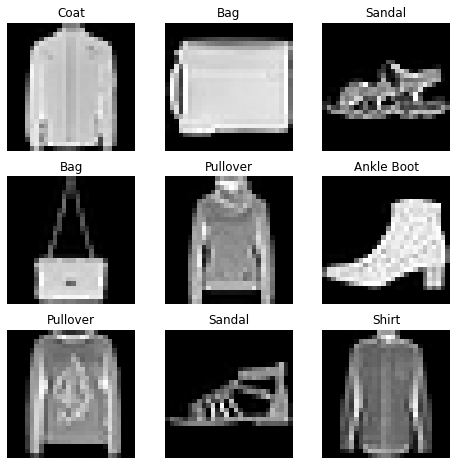

In [ ]:
labels_map = { # 숫자에 대응하는 레이블 이름을 저장하는 딕셔너리
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Creating a Custom Dataset for your files

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, 
                 annotations_file, 
                 img_dir, 
                 transform=None, 
                 target_transform=None):
        self.img_labels = pd.read_csv(annotations_file) # pandas dataframe 생성
        self.img_dir = img_dir # 이미지 경로
        self.transform = transform # 이미지 변환
        self.target_transform = target_transform # 레이블 변환

    def __len__(self):
        return len(self.img_labels) # 레이블 행 수는 데이터 샘플 수
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])
        image = read_image(img_path) # 이미지
        label = self.img_labels.iloc[idx, 1] # 레이블
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

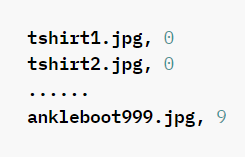

## Preparing your data for training with DataLoaders

In [ ]:
from torch.utils.data import DataLoader # 데이터로더 사용

train_dataloader = DataLoader(
    dataset=train_dataset, # 데이터셋
    batch_size=64, # 배치 사이즈
    shuffle=True # 무작위 유무
)

test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=64,
    shuffle=True
)

## Iterate through the DataLoader

Shape of inputs: torch.Size([64, 1, 28, 28])
Shape of labels: torch.Size([64])


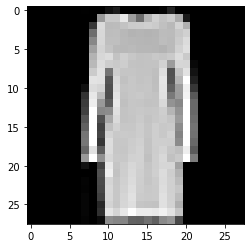

Label: 3


In [ ]:
for inputs, labels in train_dataloader:
    print(f"Shape of inputs: {inputs.size()}")
    print(f"Shape of labels: {labels.size()}")
    
    img = inputs[0].squeeze() # dim이 1인 부분 삭제
    label = labels[0]
    
    plt.imshow(img, cmap="gray")
    plt.show()
    print(f"Label: {label}")
    break

# Transforms

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

dataset = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [ ]:
y = torch.tensor([4]) # 정답 레이블은 4
print(y)

label = torch.zeros(10, dtype=torch.float) # 크기가 10인 영벡터
print(label)

label.scatter_(0, y, value=1) # y에 해당하는 값만 1로 변환
print(label)

tensor([4])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])


In [ ]:
input, label = dataset[0] # __getitem__을 통해 얻는다.
print(input.size())
print(label.size())

torch.Size([1, 28, 28])
torch.Size([10])


In [ ]:
target_transform = Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

y = torch.tensor([4])

y_transformed = target_transform(y)
print(y)
print(y_transformed)

tensor([4])
tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


# Build the Neural Network

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
# Get Device for Training
device = "cuda" if torch.cuda.is_available() else "cpu" # GPU 가속 사용 가능 여부
print(f"Using {device} device")

Using cpu device


In [ ]:
# Define the Class
class NeuralNetwork(nn.Module):
    def __init__(self): # 초기화
        super().__init__() # 부모 클래스 초기화

        self.flatten = nn.Flatten()
        
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x): # forward & backward
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model = NeuralNetwork().to(device)

print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
# How to Predict
input = torch.rand(1, 28, 28, device=device) # 임의의 입력

logits = model(input) # 출력

pred_probab = nn.Softmax(dim=1)(logits) # 확률로 변환

y_pred = pred_probab.argmax(1) # 확률이 가장 큰 인덱스

print(f"Predicted class: {y_pred}")

Predicted class: tensor([5])


In [ ]:
# Model Layers
input_image = torch.rand(3, 28, 28) # 임의의 입력
print(input_image.size())

torch.Size([3, 28, 28])


In [ ]:
# nn.Flatten
flatten = nn.Flatten()
flat_image = flatten(input_image) # 배치 차원을 제외한 모든 차원을 하나의 차원으로 변환
print(flat_image.size())

torch.Size([3, 784])


In [ ]:
# nn.Linear
linear = nn.Linear(in_features=28*28, out_features=20) # 선형 회귀
output = linear(flat_image)
print(output.size())

torch.Size([3, 20])


In [ ]:
# nn.ReLU
relu = nn.ReLU()
output_relu = relu(output) # Rectified Linear Unit
print(output)
print(output_relu)

tensor([[-0.5492,  0.8274, -0.2434,  0.1360,  0.0181, -0.1198,  0.1130,  0.3927,
         -0.1945, -0.0262,  0.2709, -0.2585,  0.3668, -0.5053,  0.0178, -0.1661,
         -0.7104, -0.0953,  0.0949, -0.3452],
        [-0.6227,  0.7566, -0.3667, -0.2421, -0.0809, -0.1510,  0.2346,  0.1486,
         -0.1457, -0.2939,  0.0224, -0.1829,  0.5144, -0.5123,  0.2284, -0.1023,
         -0.9648, -0.3914,  0.4821,  0.3304],
        [-0.3768,  0.6647, -0.1376, -0.2286, -0.1896, -0.1490,  0.0738,  0.1670,
         -0.0070,  0.0528,  0.2194, -0.2393,  0.3326, -0.5092,  0.3045,  0.0262,
         -1.0188, -0.4258,  0.2436, -0.3493]], grad_fn=<AddmmBackward0>)
tensor([[0.0000, 0.8274, 0.0000, 0.1360, 0.0181, 0.0000, 0.1130, 0.3927, 0.0000,
         0.0000, 0.2709, 0.0000, 0.3668, 0.0000, 0.0178, 0.0000, 0.0000, 0.0000,
         0.0949, 0.0000],
        [0.0000, 0.7566, 0.0000, 0.0000, 0.0000, 0.0000, 0.2346, 0.1486, 0.0000,
         0.0000, 0.0224, 0.0000, 0.5144, 0.0000, 0.2284, 0.0000, 0.0000, 0.0000,

In [ ]:
# nn.Sequential
sequential = nn.Sequential( # 다양한 함수들을 순차적으로 통과하게 한다.
    nn.Flatten(),
    nn.Linear(28*28, 20),
    nn.ReLU()
)

input = torch.rand(3, 28, 28)
output = sequential(input)
print(output.size())

torch.Size([3, 20])


In [ ]:
# nn.Softmax
softmax = nn.Softmax(dim=1) # 2번째 차원에 대해 소프트맥스 적용
output = torch.tensor([[1, 2, 3]])
prob = softmax(output)
print(prob)
pred = prob.argmax(dim=1)
print(pred)

In [ ]:
# Model Parameters
print(f"Model structure: {model}")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Value : {param[:2]}")

# Automatic Differentiation with torch.autograd

In [ ]:
import torch

x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)

z = torch.matmul(x, w) + b

loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [ ]:
print(f"Gradient function for z = {z.grad_fn}") # z를 만든 함수는 Add
print(f"Gradient function for loss = {loss.grad_fn}") # loss를 만든 함수는 BinaryCrossEntropyWithLogits

Gradient function for z = <AddBackward0 object at 0x7f026d058950>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7f026c711250>


In [ ]:
print("Before backward")
print("x.grad:", x.grad)
print("y.grad:", y.grad)
print("w.grad:", w.grad)
print("b.grad:", b.grad)
print()

loss.backward()

print("After backward")
print("x.grad:", x.grad)
print("y.grad:", y.grad)
print("w.grad:", w.grad)
print("b.grad:", b.grad)

Before backward
x.grad: None
y.grad: None
w.grad: None
b.grad: None

After backward
x.grad: None
y.grad: None
w.grad: tensor([[0.3185, 0.1701, 0.0082],
        [0.3185, 0.1701, 0.0082],
        [0.3185, 0.1701, 0.0082],
        [0.3185, 0.1701, 0.0082],
        [0.3185, 0.1701, 0.0082]])
b.grad: tensor([0.3185, 0.1701, 0.0082])


In [ ]:
A = torch.tensor([1.], requires_grad=True)
B = torch.tensor([1.], requires_grad=True)
C = A + B
print(C)
C.backward()
print(A.grad)
print(B.grad)

tensor([2.], grad_fn=<AddBackward0>)
tensor([1.])
tensor([1.])


In [ ]:
z = torch.matmul(x, w) + b
print(z.requires_grad)
print(z.grad_fn)
print()

print("with torch.no_grad()")
with torch.no_grad():
    z = torch.matmul(x, w) + b
print(z.requires_grad)
print(z.grad_fn)

True
False
None


In [ ]:
z = torch.matmul(x, w) + b
z_det = z.detach()
print(z_det.requires_grad)

False


In [ ]:
# Tensor Gradients and Jacobian Products
input = torch.eye(5, requires_grad=True)
output = (input + 1).pow(2)
output.backward(torch.ones_like(input), retain_graph=True)
print(f"First call\n{input.grad}")

output.backward(torch.ones_like(input), retain_graph=True)
print(f"\nSecond call\n{input.grad}")

input.grad.zero_()
output.backward(torch.ones_like(input), retain_graph=True)
print(f"\nCall after zeroing gradients\n{input.grad}")

First call
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])

Second call
tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.],
        [4., 4., 4., 4., 8.]])

Call after zeroing gradients
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])


# Optimizing Model Parameters

In [ ]:
# Prerequisite Code
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [ ]:
# Hyperparameters
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [ ]:
# Optimization Loop
# Loss Function
loss_fn = nn.CrossEntropyLoss()

In [ ]:
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}\n----------------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done")

# Save and Load the Model

In [ ]:
import torch
import torchvision.models as models

In [ ]:
model = models.vgg16(pretrained=True)
torch.save(model.state_dict(), 'model_weights.pth')

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:
model = models.vgg16() # we do not specify pretrained=True, i.e. do not load default weights
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
torch.save(model, 'model.pth')

In [ ]:
model = torch.load('model.pth')